# Objetivo:

En est notebook se presenta una descripción en detalle del teorema del limite central, para que sirve y en que general que permite.

In [23]:
# LIBRERIAS
import matplotlib
from ipywidgets.widgets.widget_string import Label
import numpy as np
from scipy.stats import norm
import matplotlib.pylab as plt
from scipy import stats
import pandas as pd

%matplotlib inline 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)
import seaborn as sns
import os
from scipy.stats import anderson
from scipy.stats import kstest
from scipy.stats import shapiro 
#to en otra carpeta
sns.set_theme()

 El teorema el limite central establece que cuando se calcula la media resultado de haber obtenido N medidas de una distribución de probabilidad, cuando N va a infinito, la media seguira una distribución gaussiana. Esto es:

$$\lim_{n\rightarrow \infty}\bar{x}_{n}=\lim_{n\rightarrow \infty} \frac{\sum_{i=1}^{n}x_i}{n} \sim  N(\mu, \sigma^{2}/n)$$

In [8]:
def central(s,k):
    '''
    Esta función devuelve una distribución de la media producto
    de haber elegido muestras aleatorias del array s.
    -------------
    Parametros:
    s: Array
     datos a los que se aplicara el CLT
    k: float
     Numero de datos con los que se realizara el promedio.
    '''
    new_s=[]
    for i in range(0,len(s)):
        new_s.append(np.mean(np.random.choice(s,size=k)))
    return new_s

def confirm_gauss(s):
    result = (anderson(np.sort(s), dist='norm'))
    criterio=((result[0]<result[1][3])or(shapiro(np.sort(s))[1]>0.05))*1   
    return criterio

# Ejemplo:

Considere dos variables aleatorias X y Y que distribuyen de acuerdo a una distribucion normal. ¿Cuál es la distribución formada a partir del producto?

In [40]:
mu1=1
mu2=1
sigma1=2
sigma2=1
x=np.random.normal(mu1,sigma1,1000)
y=np.random.normal(mu2,sigma2,1000)
z=x*y # Distribucion formada a partir del producto



A continuación se verifica a partir de que tamaño de la muestra poblacional, se puede inferir que la distribución asociada a la media es Gaussiana.

Text(0, 0.5, 'Gauss (?)')

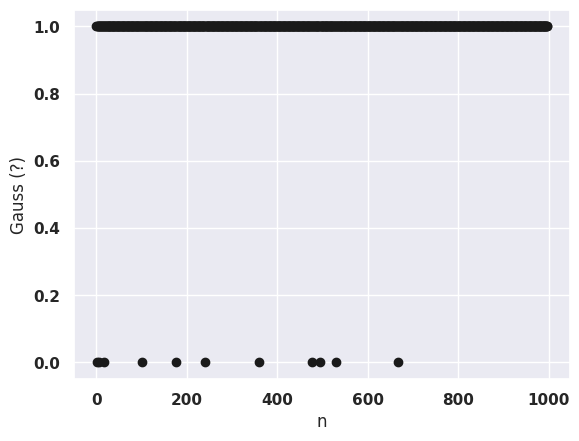

In [27]:
valid=[]
for n in range(1,len(z)-1):
    valid.append(confirm_gauss(central(z,n)))
plt.plot(valid , 'ko')
plt.xlabel('n')
plt.ylabel('Gauss (?)')


Criterio Gaussiano 0
Criterio Gaussiano 1


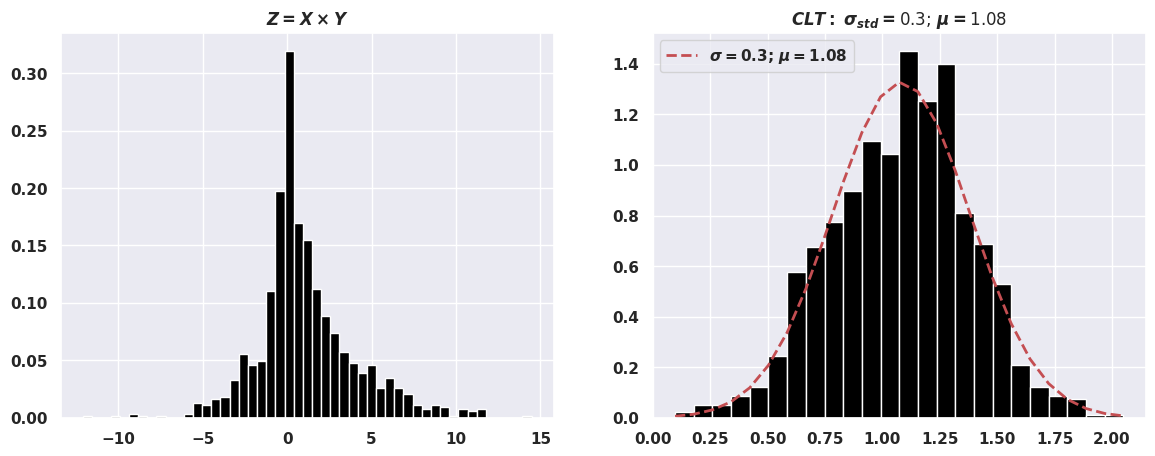

In [41]:
f=plt.figure(figsize=(14,5))

plt.subplot(121)
n, bins, patches=plt.hist(z,bins='fd',density=True,color='black')
plt.title(r'$Z=X \times Y $')
print('Criterio Gaussiano',confirm_gauss(z))

plt.subplot(122)
n=100
clt=central(z,n)
desv=np.std(z,ddof=1)
standard=desv/np.sqrt(n)
plt.title('$CLT: $ $\sigma_{std}= $'+str(round(standard,2))+'; $\mu=$'+str(round(np.mean(z),2)))
n, bins, patches=plt.hist(clt,bins='fd',density=True,color='black')
(mu, sigma) = norm.fit(clt)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y,'r--',label='$\sigma= $'+str(round(sigma,2))+'; $\mu=$'+str(round(mu,2)), linewidth=2)
plt.legend()
print('Criterio Gaussiano',confirm_gauss(clt))


In [42]:
np.mean(clt)

1.0820307087053194

In [43]:
np.mean(z)

1.0802418412578891